**Final Project AAI-551**

Name : Brinda Nathvani , CWID - (20011268)

Name : Saumil Trivedi  , CWID - (20011349) 


 **Introduction:**

1. In this project, we build Convolutional Neural Network to classify CIFAR-10 Images.
2. We can directly load dataset from many deep learning packages.
3. We can use any deep learning packages such as pytorch, keras or tensorflow for this project.

## **Data analysis on CIFAR-10 Dataset**

###  Loading the  data


In [1]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
import keras
import numpy as np
import tensorflow.keras

### If you can not load keras dataset, un-comment these two lines.
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### **One-hot encode the labels**

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.



In [2]:
def to_one_hot(y, num_class=10):
    y_new = []
    for val in y:
        tempArr = np.zeros(num_class)
        tempArr[val] = 1
        y_new.append(tempArr)
    
    return np.asarray(y_new)
    pass
    
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Randomly partition the training set to training and validation sets **
Randomly partition the 50K training samples to 2 sets: 
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [3]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train_vec,test_size=0.2,shuffle=True)

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## Building  a CNN and tunning its hyper-parameters






In [4]:
# Build the model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

In [5]:
# Define model optimizer and loss function
from tensorflow.keras import optimizers

lr = 0.0001
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate = lr), metrics=['accuracy'])

In [6]:
# Train the model and store model parameters/loss values
model_1 = model.fit(x_tr, y_tr, batch_size=128, epochs=50, validation_data=(x_val, y_val))
model.save('model_1.h5')

Epoch 1/50
313/313 [==============================] - 7s 11ms/step - loss: 1.9793 - accuracy: 0.2966 - val_loss: 1.7815 - val_accuracy: 0.3744
Epoch 2/50
313/313 [==============================] - 4s 11ms/step - loss: 1.6885 - accuracy: 0.4033 - val_loss: 1.7231 - val_accuracy: 0.3869
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 1.5602 - accuracy: 0.4443 - val_loss: 1.5334 - val_accuracy: 0.4540
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.4665 - accuracy: 0.4803 - val_loss: 1.4519 - val_accuracy: 0.4835
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 1.3961 - accuracy: 0.5067 - val_loss: 1.4241 - val_accuracy: 0.4991
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 1.3428 - accuracy: 0.5277 - val_loss: 1.3299 - val_accuracy: 0.5325
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2971 - accuracy: 0.5444 - val_loss: 1.3057 - val_accuracy: 0.5392


## Plot the training and validation loss curve versus epochs.

In [7]:
model_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

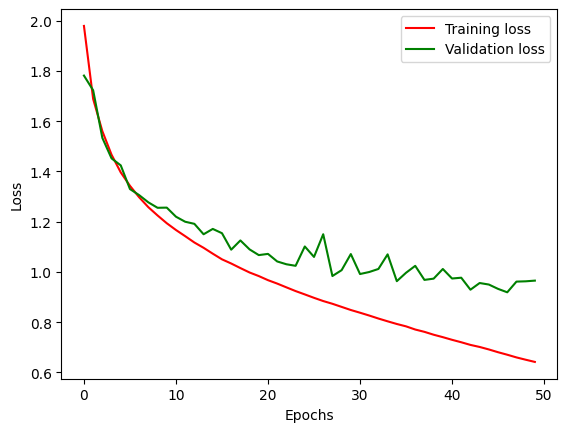

In [8]:
# Plot the loss curve

import matplotlib.pyplot as plt
#%matplotlib inline

loss = model_1.history['loss']
val_loss = model_1.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')

epochs = range(len(loss))

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')

plt.legend()
plt.show()

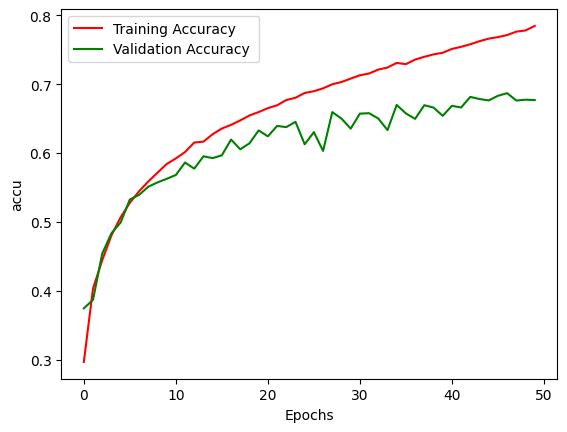

In [9]:
# Plot the Accuracy  curve

import matplotlib.pyplot as plt
#%matplotlib inline

accu = model_1.history['accuracy']
val_accu = model_1.history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('accu')

epochs = range(len(accu))

plt.plot(epochs, accu, 'red', label='Training Accuracy ')
plt.plot(epochs, val_accu, 'green', label='Validation Accuracy ')

plt.legend()
plt.show()

## Train (again) and evaluating the model

### Train the model on the entire training set

Why? Previously, we used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [10]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (4, 4), activation = 'relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate = 0.0001) , metrics=['acc'])

In [11]:
#<Train your model on the entire training set (50K samples)>
model_2 = model.fit(x_train, y_train_vec, batch_size=128, epochs=50)
model.save('model_2.h5')

Epoch 1/50
391/391 [==============================] - 4s 7ms/step - loss: 1.9171 - acc: 0.3247
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6056 - acc: 0.4357
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4844 - acc: 0.4780
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.4078 - acc: 0.5090
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3491 - acc: 0.5275
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2965 - acc: 0.5466
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2545 - acc: 0.5656
Epoch 8/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2149 - acc: 0.5775
Epoch 9/50
391/391 [==============================] - 2s 5ms/step - loss: 1.1793 - acc: 0.5916
Epoch 10/50
391/391 [==============================] - 2s 5ms/step - loss: 1.1492 - acc: 0.6022
Epoch 11/50
391/391 [============================

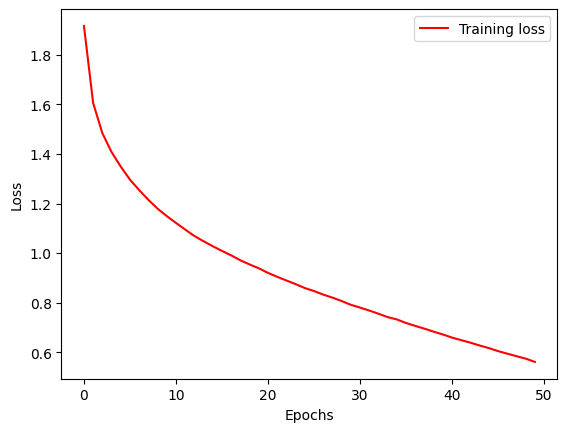

In [12]:
# Plot the loss curve

import matplotlib.pyplot as plt
#%matplotlib inline

loss = model_2.history['loss']


plt.xlabel('Epochs')
plt.ylabel('Loss')

epochs = range(len(loss))

plt.plot(epochs, loss, 'red', label='Training loss')

plt.legend()
plt.show()

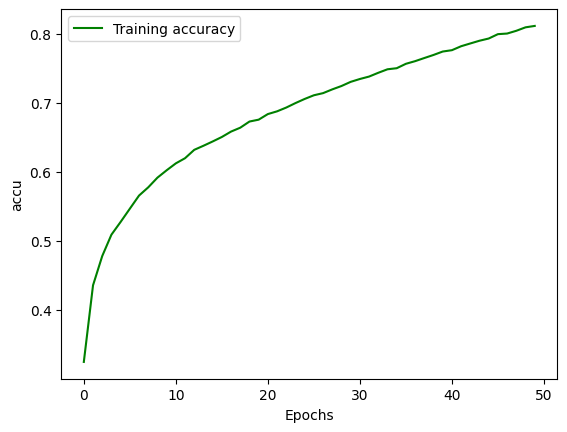

In [13]:
# Plot the Accuracy curve

import matplotlib.pyplot as plt
#%matplotlib inline

accu = model_2.history['acc']


plt.xlabel('Epochs')
plt.ylabel('accu')
epochs = range(len(accu))

plt.plot(epochs, accu, 'Green', label='Training accuracy')

plt.legend()
plt.show()

**Evaluate the model on the test set**

Do NOT use the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [14]:
from keras.models import load_model

current_model = load_model('model_1.h5')
Current_acc = current_model.evaluate(x_test, y_test_vec)
print('loss = ' + str(Current_acc[0]))
print('accuracy = ' + str(Current_acc[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9513 - accuracy: 0.6782
loss = 0.9512962698936462
accuracy = 0.6782000064849854


In [15]:
current_model = load_model('model_2.h5')
Current_acc = current_model.evaluate(x_test, y_test_vec)
print('loss = ' + str(Current_acc[0]))
print('accuracy = ' + str(Current_acc[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9222 - acc: 0.6905
loss = 0.9222323298454285
accuracy = 0.690500020980835
